<div style="background-color:#e6f0ff; padding:15px; border-radius:10px; font-size:16px">

### 📘 Exercise 4 – Cross-Validation Basics | ML Basics

</div>

## Objective
Understand the importance of cross-validation in model evaluation and compare it with simple train/test split.

## Step 1: Imports & Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

In [2]:
# Load dataset
data = load_iris()
X, y = data.data, data.target
X = X[y != 2]  # Binary classification (setosa vs versicolor)
y = y[y != 2]

## Step 2: Train/Test Split Evaluation

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print(f"Train/Test Split Accuracy: {model.score(X_test, y_test):.2f}")

Train/Test Split Accuracy: 1.00


## Step 3: K-Fold Cross-Validation

In [4]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LogisticRegression(), X, y, cv=kf)
print("K-Fold CV Accuracies:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

K-Fold CV Accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.00


## Step 4: Stratified K-Fold

In [5]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
strat_scores = cross_val_score(LogisticRegression(), X, y, cv=skf)
print("Stratified K-Fold Accuracies:", strat_scores)
print(f"Mean Accuracy: {np.mean(strat_scores):.2f}")

Stratified K-Fold Accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.00


## Step 5: Visualize Comparison

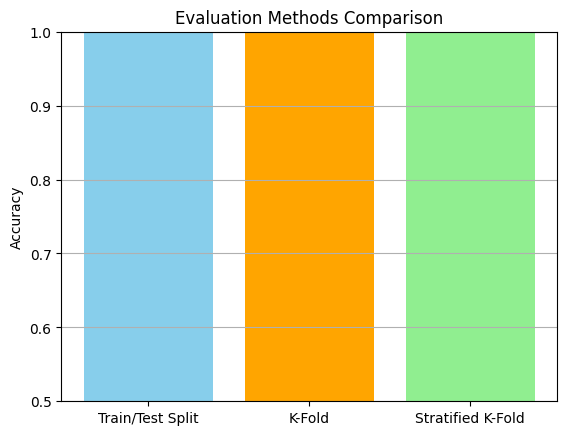

In [6]:
methods = ['Train/Test Split', 'K-Fold', 'Stratified K-Fold']
scores = [model.score(X_test, y_test), np.mean(cv_scores), np.mean(strat_scores)]

plt.bar(methods, scores, color=['skyblue', 'orange', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Evaluation Methods Comparison')
plt.ylim(0.5, 1.0)
plt.grid(True, axis='y')
plt.show()

## ✅ Summary
Cross-validation gives more reliable performance estimates.

Stratified K-Fold is better for imbalanced datasets.

K-Fold helps reduce variance in model evaluation.